### FastSpecFit Tutorial

This notebook is a very basic introduction to running `FastSpecFit`. For additional documentation and details, including the detailed data model, please read [the documentation](https://fastspecfit.readthedocs.io/en/latest).

#### Command-line

To load a stable version of the code and all its dependencies, launch an interactive node at NERSC with
```bash
salloc -N 1 -C cpu -A desi -t 01:00:00 --qos interactive
```
and then run:
```bash
source /global/common/software/desi/desi_environment.sh 23.1
module load fastspecfit/2.5.1
```
If you need more recently added features (whether in `FastSpecFit` or the DESI software stack, you can load the latest versions of everything with:
```bash
source /global/common/software/desi/desi_environment.sh main
module load fastspecfit/main
```

#### Jupyter Notebook

Alternatively, some users may be interested in running `FastSpecFit` exclusively in a Jupyter notebook. In order to set up the appropriate kernel, do the following (but just once!):
```
mkdir -p ${HOME}/.local/share/jupyter/kernels/fastspecfit
wget -O ${HOME}/.local/share/jupyter/kernels/fastspecfit/kernel.json \
  https://raw.githubusercontent.com/desihub/fastspecfit/main/etc/jupyter-kernel.json
```
Then, in the *JupyterLab Launcher* you should see `FastSpecFit` as one of the available kernels. 

Note that by default the kernel will use the `FastSpecFit` version hard-coded in `$DESI_ROOT/spectro/fastspecfit/software/activate_fastspecfit_jupyter.sh`, which as of this writing is `main`. 

If you want to use a tagged version of the code then you will need to edit the appropriate kernel (`.json`) file.

John Moustakas  
Siena College  
2024 April 19

#### Basic imports

In [1]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
from desispec.io import findfile
from fastspecfit.io import read_fastspecfit
from fastspecfit.qa import fastqa
from fastspecfit.fastspecfit import fastspec, fastphot

#### Build and read a `fastspec` model.

As an initial simple example, let's fit a single galaxy in a notebook. (Skip this section if you already have fitting results that you just want to read.) 

`FastSpecFit` has two "modes"--`fastspec` which will jointly fit the spectroscopy and the broadband photometry (at the `Redrock` redshift and with a simple aperture correction); and `fastphot`, which will fit the broadband photometry only. Let's demonstrate `fastspec` first, using a simple wrapper script (with many command-line options) which can be called directly.

The only *required* inputs are the name of the `Redrock` file which contains the object you are interested in and the output filename. Here, I have chosen a BGS target from Iron/SV3.

In [3]:
survey, program, healpix = 'sv3', 'bright', 25916
targetid = 39627739988231708
redrockfile = findfile('redrock', survey=survey, faprogram=program, healpix=healpix, groupname='healpix', 
                       specprod_dir=os.path.join(os.getenv('DESI_SPECTRO_REDUX'), 'iron'))
redrockfile

'/global/cfs/cdirs/desi/spectro/redux/iron/healpix/sv3/bright/259/25916/redrock-sv3-bright-25916.fits'

Specify the output directory and output filename, but note that there's an issue with retrieving and writing the image cutouts to `$PSCRATCH` (for the QA, below), although `$HOME`seems to work OK.

In [4]:
# change this to whatever you want
outdir = os.getenv('HOME')
fastspecfile = os.path.join(outdir, f'fastspec-{targetid}.fits')

In [5]:
cmdargs = f'{redrockfile} --targetids {targetid} -o {fastspecfile}'
cmdargs

'/global/cfs/cdirs/desi/spectro/redux/iron/healpix/sv3/bright/259/25916/redrock-sv3-bright-25916.fits --targetids 39627739988231708 -o /global/homes/i/ioannis/fastspec-39627739988231708.fits'

Calling `fastspec` provides lots of detailed output, which in production gets logged.

In [6]:
fastspec(args=cmdargs.split())

INFO:fastspecfit.py:126:parse: fastspec /global/cfs/cdirs/desi/spectro/redux/iron/healpix/sv3/bright/259/25916/redrock-sv3-bright-25916.fits --targetids 39627739988231708 -o /global/homes/i/ioannis/fastspec-39627739988231708.fits
INFO:io.py:687:select: Reading and parsing 1 unique redrockfile(s).
INFO:io.py:742:select: specprod=iron, coadd_type=healpix, survey=sv3, program=bright, healpix=25916
INFO:io.py:994:select: Gathered photometric metadata in 0.06 sec
INFO:io.py:1091:read_and_unpack: Reading 1 spectrum from /global/cfs/cdirs/desi/spectro/redux/iron/healpix/sv3/bright/259/25916/coadd-sv3-bright-25916.fits
INFO:spectra.py:391:read_spectra: iotime 1.101 sec to read coadd-sv3-bright-25916.fits at 2024-04-19T06:56:46.097236
INFO:io.py:1139:read_and_unpack: Coadding across cameras took 0.01 seconds.
INFO:io.py:106:unpack_one_spectrum: Pre-processing object 0 [targetid 39627739988231708 z=0.214295].
INFO:fastspecfit.py:204:fastspec: Reading and unpacking 1 spectra to be fitted took 3.2

##### Generate and display the QA. 

In [7]:
cmdargs = f'{fastspecfile} -o {outdir} --overwrite'
fastqa(args=cmdargs.split())

INFO:qa.py:1219:parse: fastspecfit-qa /global/homes/i/ioannis/fastspec-39627739988231708.fits -o /global/homes/i/ioannis --overwrite
INFO:io.py:1859:read_fastspecfit: Read 1 object(s) from /global/homes/i/ioannis/fastspec-39627739988231708.fits
INFO:qa.py:1306:fastqa: Building QA for 1 objects.
INFO:io.py:687:select: Reading and parsing 1 unique redrockfile(s).
INFO:io.py:742:select: specprod=iron, coadd_type=healpix, survey=sv3, program=bright, healpix=25916
INFO:io.py:994:select: Gathered photometric metadata in 0.06 sec
INFO:io.py:1091:read_and_unpack: Reading 1 spectrum from /global/cfs/cdirs/desi/spectro/redux/iron/healpix/sv3/bright/259/25916/coadd-sv3-bright-25916.fits
INFO:spectra.py:391:read_spectra: iotime 1.070 sec to read coadd-sv3-bright-25916.fits at 2024-04-19T06:56:56.530753
INFO:io.py:1139:read_and_unpack: Coadding across cameras took 0.01 seconds.
INFO:io.py:106:unpack_one_spectrum: Pre-processing object 0 [targetid 39627739988231708 z=0.214295].
INFO:qa.py:447:qa_fas

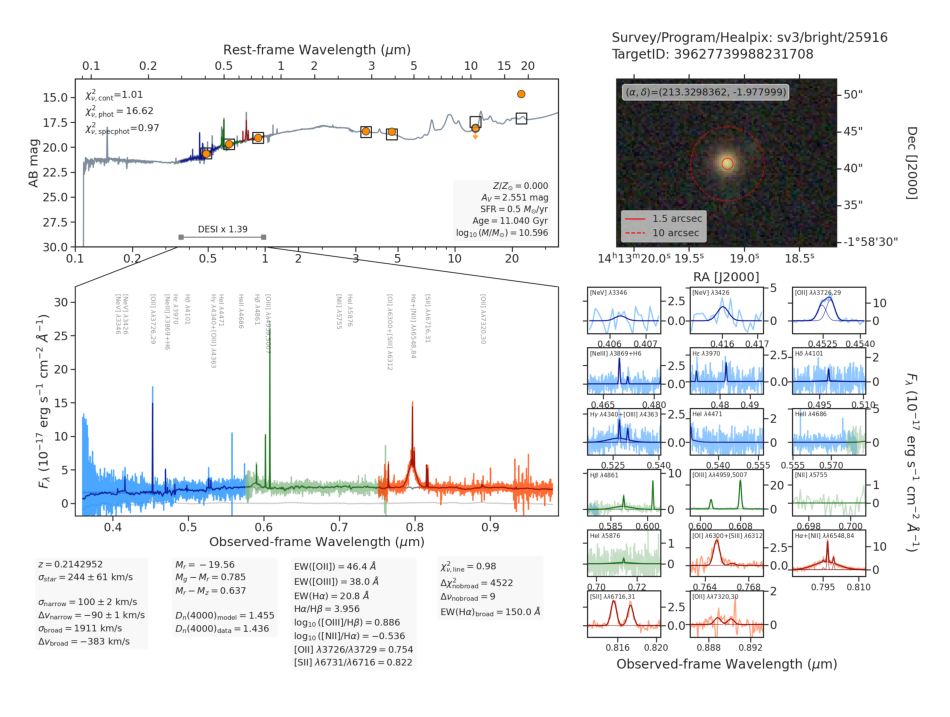

In [8]:
fastspec_pngfile = os.path.join(outdir, f'fastspec-{survey}-{program}-{healpix}-{targetid}.png')
img = mpimg.imread(fastspec_pngfile)

fig, ax = plt.subplots(figsize=(12, 12))
ax.imshow(img)
_ = ax.axis('off')

##### Read the fitting results. Click [here](https://fastspecfit.readthedocs.io/en/latest/fastspec.html) for a description of the data model.

In [9]:
fastspecfit, metaspec, _, _, models = read_fastspecfit(fastspecfile, read_models=True)
metaspec

INFO:io.py:1859:read_fastspecfit: Read 1 object(s) from /global/homes/i/ioannis/fastspec-39627739988231708.fits


TARGETID,SURVEY,PROGRAM,HEALPIX,TILEID_LIST,RA,DEC,COADD_FIBERSTATUS,CMX_TARGET,DESI_TARGET,BGS_TARGET,MWS_TARGET,SCND_TARGET,SV1_DESI_TARGET,SV1_BGS_TARGET,SV1_MWS_TARGET,SV2_DESI_TARGET,SV2_BGS_TARGET,SV2_MWS_TARGET,SV3_DESI_TARGET,SV3_BGS_TARGET,SV3_MWS_TARGET,SV1_SCND_TARGET,SV2_SCND_TARGET,SV3_SCND_TARGET,Z,ZWARN,DELTACHI2,SPECTYPE,Z_RR,TSNR2_BGS,TSNR2_LRG,TSNR2_ELG,TSNR2_QSO,TSNR2_LYA,PHOTSYS,LS_ID,FIBERFLUX_G,FIBERFLUX_R,FIBERFLUX_Z,FIBERTOTFLUX_G,FIBERTOTFLUX_R,FIBERTOTFLUX_Z,FLUX_G,FLUX_R,FLUX_Z,FLUX_W1,FLUX_W2,FLUX_W3,FLUX_W4,FLUX_IVAR_G,FLUX_IVAR_R,FLUX_IVAR_Z,FLUX_IVAR_W1,FLUX_IVAR_W2,FLUX_IVAR_W3,FLUX_IVAR_W4,EBV,MW_TRANSMISSION_G,MW_TRANSMISSION_R,MW_TRANSMISSION_Z,MW_TRANSMISSION_W1,MW_TRANSMISSION_W2,MW_TRANSMISSION_W3,MW_TRANSMISSION_W4,SPECPROD
int64,str3,str6,int32,str11,float64,float64,int32,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,float64,int64,float64,str6,float64,float32,float32,float32,float32,float32,str1,int64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,str4
39627739988231708,sv3,bright,25916,527 532 534,213.3298361890671,-1.977998675434142,0,0,0,0,0,0,0,0,0,0,0,0,1152921504606846976,65545,0,0,0,0,0.2142951573570989,0,10975.917741894722,QSO,0.2142951573570989,4149.322,46.341225,69.08763,17.690088,55.42813,S,9906620718188060,2.2637374,5.9708343,11.016341,2.7833748,6.8627596,11.908954,5.54281,13.666494,23.71548,43.94549,42.700092,-143.19994,1393.6357,256.6676,239.51823,42.43904,2.2798975,0.57063484,0.0011564309,1.6774813e-05,0.069851846,0.8133067,0.87003404,0.9250469,0.98823196,0.9927564,0.9984507,0.99941474,iron


In [10]:
fastspecfit

TARGETID,SURVEY,PROGRAM,HEALPIX,Z,COEFF,RCHI2,RCHI2_CONT,RCHI2_PHOT,SNR_B,SNR_R,SNR_Z,SMOOTHCORR_B,SMOOTHCORR_R,SMOOTHCORR_Z,VDISP,VDISP_IVAR,AV,AGE,ZZSUN,LOGMSTAR,SFR,DN4000,DN4000_OBS,DN4000_IVAR,DN4000_MODEL,FLUX_SYNTH_G,FLUX_SYNTH_R,FLUX_SYNTH_Z,FLUX_SYNTH_SPECMODEL_G,FLUX_SYNTH_SPECMODEL_R,FLUX_SYNTH_SPECMODEL_Z,FLUX_SYNTH_PHOTMODEL_G,FLUX_SYNTH_PHOTMODEL_R,FLUX_SYNTH_PHOTMODEL_Z,FLUX_SYNTH_PHOTMODEL_W1,FLUX_SYNTH_PHOTMODEL_W2,FLUX_SYNTH_PHOTMODEL_W3,FLUX_SYNTH_PHOTMODEL_W4,ABSMAG10_DECAM_G,ABSMAG10_IVAR_DECAM_G,KCORR10_DECAM_G,ABSMAG10_DECAM_R,ABSMAG10_IVAR_DECAM_R,KCORR10_DECAM_R,ABSMAG10_DECAM_Z,ABSMAG10_IVAR_DECAM_Z,KCORR10_DECAM_Z,ABSMAG00_U,ABSMAG00_IVAR_U,KCORR00_U,ABSMAG00_B,ABSMAG00_IVAR_B,KCORR00_B,ABSMAG00_V,ABSMAG00_IVAR_V,KCORR00_V,ABSMAG01_SDSS_U,ABSMAG01_IVAR_SDSS_U,KCORR01_SDSS_U,ABSMAG01_SDSS_G,ABSMAG01_IVAR_SDSS_G,KCORR01_SDSS_G,ABSMAG01_SDSS_R,ABSMAG01_IVAR_SDSS_R,KCORR01_SDSS_R,ABSMAG01_SDSS_I,ABSMAG01_IVAR_SDSS_I,KCORR01_SDSS_I,ABSMAG01_SDSS_Z,ABSMAG01_IVAR_SDSS_Z,KCORR01_SDSS_Z,ABSMAG01_W1,ABSMAG01_IVAR_W1,KCORR01_W1,LOGLNU_1500,LOGLNU_2800,LOGL_1450,LOGL_1700,LOGL_3000,LOGL_5100,FLYA_1215_CONT,FOII_3727_CONT,FHBETA_CONT,FOIII_5007_CONT,FHALPHA_CONT,RCHI2_LINE,DELTA_LINECHI2,DELTA_LINENDOF,APERCORR,APERCORR_G,APERCORR_R,APERCORR_Z,NARROW_Z,NARROW_ZRMS,BROAD_Z,BROAD_ZRMS,UV_Z,UV_ZRMS,NARROW_SIGMA,NARROW_SIGMARMS,BROAD_SIGMA,BROAD_SIGMARMS,UV_SIGMA,UV_SIGMARMS,MGII_DOUBLET_RATIO,OII_DOUBLET_RATIO,SII_DOUBLET_RATIO,LYALPHA_MODELAMP,LYALPHA_AMP,LYALPHA_AMP_IVAR,LYALPHA_FLUX,LYALPHA_FLUX_IVAR,LYALPHA_BOXFLUX,LYALPHA_BOXFLUX_IVAR,LYALPHA_VSHIFT,LYALPHA_SIGMA,LYALPHA_CONT,LYALPHA_CONT_IVAR,LYALPHA_EW,LYALPHA_EW_IVAR,LYALPHA_FLUX_LIMIT,LYALPHA_EW_LIMIT,LYALPHA_CHI2,LYALPHA_NPIX,OI_1304_MODELAMP,OI_1304_AMP,OI_1304_AMP_IVAR,OI_1304_FLUX,OI_1304_FLUX_IVAR,OI_1304_BOXFLUX,OI_1304_BOXFLUX_IVAR,OI_1304_VSHIFT,OI_1304_SIGMA,OI_1304_CONT,OI_1304_CONT_IVAR,OI_1304_EW,OI_1304_EW_IVAR,OI_1304_FLUX_LIMIT,OI_1304_EW_LIMIT,OI_1304_CHI2,OI_1304_NPIX,SILIV_1396_MODELAMP,SILIV_1396_AMP,SILIV_1396_AMP_IVAR,SILIV_1396_FLUX,SILIV_1396_FLUX_IVAR,SILIV_1396_BOXFLUX,SILIV_1396_BOXFLUX_IVAR,SILIV_1396_VSHIFT,SILIV_1396_SIGMA,SILIV_1396_CONT,SILIV_1396_CONT_IVAR,SILIV_1396_EW,SILIV_1396_EW_IVAR,SILIV_1396_FLUX_LIMIT,SILIV_1396_EW_LIMIT,SILIV_1396_CHI2,SILIV_1396_NPIX,CIV_1549_MODELAMP,CIV_1549_AMP,CIV_1549_AMP_IVAR,CIV_1549_FLUX,CIV_1549_FLUX_IVAR,CIV_1549_BOXFLUX,CIV_1549_BOXFLUX_IVAR,CIV_1549_VSHIFT,CIV_1549_SIGMA,CIV_1549_CONT,CIV_1549_CONT_IVAR,CIV_1549_EW,CIV_1549_EW_IVAR,CIV_1549_FLUX_LIMIT,CIV_1549_EW_LIMIT,CIV_1549_CHI2,CIV_1549_NPIX,HEII_1640_MODELAMP,HEII_1640_AMP,HEII_1640_AMP_IVAR,HEII_1640_FLUX,HEII_1640_FLUX_IVAR,HEII_1640_BOXFLUX,HEII_1640_BOXFLUX_IVAR,HEII_1640_VSHIFT,HEII_1640_SIGMA,HEII_1640_CONT,HEII_1640_CONT_IVAR,HEII_1640_EW,HEII_1640_EW_IVAR,HEII_1640_FLUX_LIMIT,HEII_1640_EW_LIMIT,HEII_1640_CHI2,HEII_1640_NPIX,ALIII_1857_MODELAMP,ALIII_1857_AMP,ALIII_1857_AMP_IVAR,ALIII_1857_FLUX,ALIII_1857_FLUX_IVAR,ALIII_1857_BOXFLUX,ALIII_1857_BOXFLUX_IVAR,ALIII_1857_VSHIFT,ALIII_1857_SIGMA,ALIII_1857_CONT,ALIII_1857_CONT_IVAR,ALIII_1857_EW,ALIII_1857_EW_IVAR,ALIII_1857_FLUX_LIMIT,ALIII_1857_EW_LIMIT,ALIII_1857_CHI2,ALIII_1857_NPIX,SILIII_1892_MODELAMP,SILIII_1892_AMP,SILIII_1892_AMP_IVAR,SILIII_1892_FLUX,SILIII_1892_FLUX_IVAR,SILIII_1892_BOXFLUX,SILIII_1892_BOXFLUX_IVAR,SILIII_1892_VSHIFT,SILIII_1892_SIGMA,SILIII_1892_CONT,SILIII_1892_CONT_IVAR,SILIII_1892_EW,SILIII_1892_EW_IVAR,SILIII_1892_FLUX_LIMIT,SILIII_1892_EW_LIMIT,SILIII_1892_CHI2,SILIII_1892_NPIX,CIII_1908_MODELAMP,CIII_1908_AMP,CIII_1908_AMP_IVAR,CIII_1908_FLUX,CIII_1908_FLUX_IVAR,CIII_1908_BOXFLUX,CIII_1908_BOXFLUX_IVAR,CIII_1908_VSHIFT,CIII_1908_SIGMA,CIII_1908_CONT,CIII_1908_CONT_IVAR,CIII_1908_EW,CIII_1908_EW_IVAR,CIII_1908_FLUX_LIMIT,CIII_1908_EW_LIMIT,CIII_1908_CHI2,CIII_1908_NPIX,MGII_2796_MODELAMP,MGII_2796_AMP,MGII_2796_AMP_IVAR,MGII_2796_FLUX,MGII_2796_FLUX_IVAR,MGII_2796_BOXFLUX,MGII_2796_BOXFLUX_IVAR,MGII_2796_VSHIFT,MGII_2796_SIGMA,MGII_2796_CONT,MG

The `models` numpy array, contains the best-fitting spectral models, which you can read more about [here](https://fastspecfit.readthedocs.io/en/latest/fastspec.html#hdu03).

In [11]:
models.shape

(1, 3, 7781)

#### Let's fit (and inspect) the same object, this time ignoring the broadband photometry.

In [12]:
fastspecfile_nophoto = os.path.join(outdir, f'fastspec-{targetid}-nophoto.fits')
cmdargs = f'{redrockfile} --targetids {targetid} -o {fastspecfile_nophoto} --ignore-photometry'
fastspec(args=cmdargs.split())

INFO:fastspecfit.py:126:parse: fastspec /global/cfs/cdirs/desi/spectro/redux/iron/healpix/sv3/bright/259/25916/redrock-sv3-bright-25916.fits --targetids 39627739988231708 -o /global/homes/i/ioannis/fastspec-39627739988231708-nophoto.fits --ignore-photometry
INFO:io.py:687:select: Reading and parsing 1 unique redrockfile(s).
INFO:io.py:742:select: specprod=iron, coadd_type=healpix, survey=sv3, program=bright, healpix=25916
INFO:io.py:994:select: Gathered photometric metadata in 0.05 sec
INFO:io.py:1091:read_and_unpack: Reading 1 spectrum from /global/cfs/cdirs/desi/spectro/redux/iron/healpix/sv3/bright/259/25916/coadd-sv3-bright-25916.fits
INFO:spectra.py:391:read_spectra: iotime 1.090 sec to read coadd-sv3-bright-25916.fits at 2024-04-19T06:57:03.916965
INFO:io.py:1139:read_and_unpack: Coadding across cameras took 0.01 seconds.
INFO:io.py:106:unpack_one_spectrum: Pre-processing object 0 [targetid 39627739988231708 z=0.214295].
INFO:fastspecfit.py:204:fastspec: Reading and unpacking 1 s

In [13]:
cmdargs = f'{fastspecfile_nophoto} -o {outdir} --overwrite --outprefix=fastspec-nophoto'
fastqa(args=cmdargs.split())

INFO:qa.py:1219:parse: fastspecfit-qa /global/homes/i/ioannis/fastspec-39627739988231708-nophoto.fits -o /global/homes/i/ioannis --overwrite --outprefix=fastspec-nophoto
INFO:io.py:1859:read_fastspecfit: Read 1 object(s) from /global/homes/i/ioannis/fastspec-39627739988231708-nophoto.fits
INFO:qa.py:1306:fastqa: Building QA for 1 objects.
INFO:io.py:687:select: Reading and parsing 1 unique redrockfile(s).
INFO:io.py:742:select: specprod=iron, coadd_type=healpix, survey=sv3, program=bright, healpix=25916
INFO:io.py:994:select: Gathered photometric metadata in 0.06 sec
INFO:io.py:1091:read_and_unpack: Reading 1 spectrum from /global/cfs/cdirs/desi/spectro/redux/iron/healpix/sv3/bright/259/25916/coadd-sv3-bright-25916.fits
INFO:spectra.py:391:read_spectra: iotime 1.080 sec to read coadd-sv3-bright-25916.fits at 2024-04-19T06:57:13.871681
INFO:io.py:1139:read_and_unpack: Coadding across cameras took 0.01 seconds.
INFO:io.py:106:unpack_one_spectrum: Pre-processing object 0 [targetid 3962773

Notice how the photometric data points are now open, not filled circles.

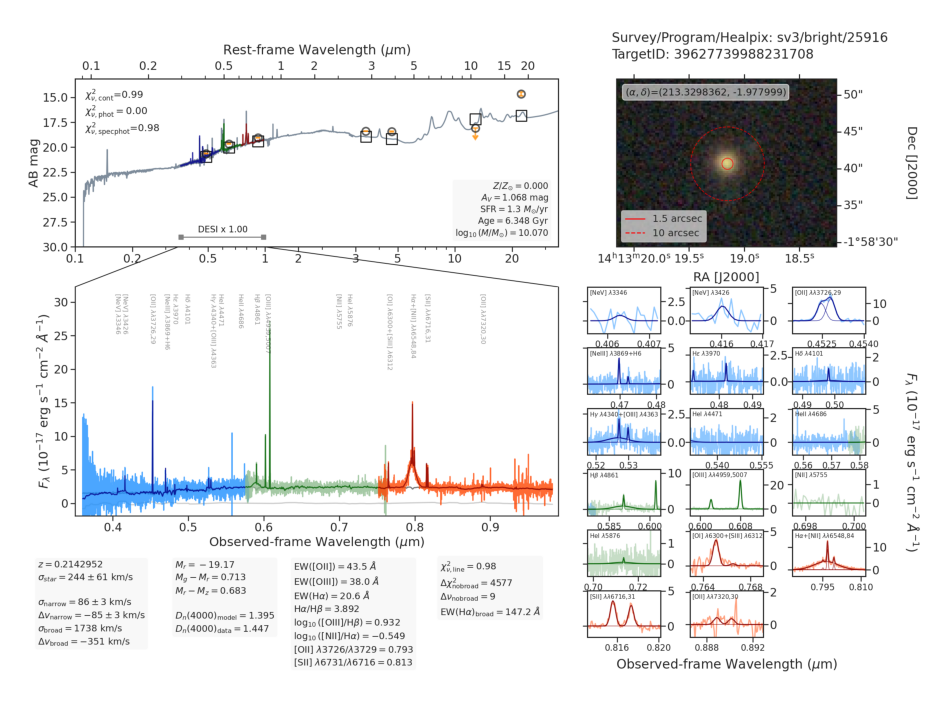

In [14]:
fastspec_pngfile_nophoto = os.path.join(outdir, f'fastspec-nophoto-{survey}-{program}-{healpix}-{targetid}.png')
img = mpimg.imread(fastspec_pngfile_nophoto)

fig, ax = plt.subplots(figsize=(12, 12))
ax.imshow(img)
_ = ax.axis('off')

#### Build and read a `fastphot` model.

Next, let's demonstrate the use of `fastphot`, which only models the broadband photometry and therefore is significantly faster. 

The only required input is still a `Redrock` filename, because the metadata in that file is used to retrieve the appropriate Legacy Surveys photometry.

In [15]:
fastphotfile = os.path.join(outdir, f'fastphot-{targetid}.fits')
cmdargs = f'{redrockfile} --targetids {targetid} -o {fastphotfile}'
fastphot(args=cmdargs.split())

INFO:fastspecfit.py:126:parse: fastspec /global/cfs/cdirs/desi/spectro/redux/iron/healpix/sv3/bright/259/25916/redrock-sv3-bright-25916.fits --targetids 39627739988231708 -o /global/homes/i/ioannis/fastphot-39627739988231708.fits
INFO:io.py:687:select: Reading and parsing 1 unique redrockfile(s).
INFO:io.py:742:select: specprod=iron, coadd_type=healpix, survey=sv3, program=bright, healpix=25916
INFO:io.py:994:select: Gathered photometric metadata in 0.05 sec
INFO:io.py:1091:read_and_unpack: Reading 1 spectrum from /global/cfs/cdirs/desi/spectro/redux/iron/healpix/sv3/bright/259/25916/coadd-sv3-bright-25916.fits
INFO:io.py:106:unpack_one_spectrum: Pre-processing object 0 [targetid 39627739988231708 z=0.214295].
INFO:fastspecfit.py:204:fastspec: Reading and unpacking 1 spectra to be fitted took 0.29 seconds.
INFO:fastspecfit.py:50:fastspec_one: Continuum- and emission-line fitting object 0 [targetid 39627739988231708, z=0.214295].
INFO:continuum.py:1998:continuum_specfit: Adopting nomina

In [16]:
fastphotfit, metaphot, _, _ = read_fastspecfit(fastphotfile, read_models=False)
fastphotfit

INFO:io.py:1859:read_fastspecfit: Read 1 object(s) from /global/homes/i/ioannis/fastphot-39627739988231708.fits


TARGETID,SURVEY,PROGRAM,HEALPIX,Z,COEFF,RCHI2_PHOT,VDISP,AV,AGE,ZZSUN,LOGMSTAR,SFR,DN4000_MODEL,FLUX_SYNTH_PHOTMODEL_G,FLUX_SYNTH_PHOTMODEL_R,FLUX_SYNTH_PHOTMODEL_Z,FLUX_SYNTH_PHOTMODEL_W1,FLUX_SYNTH_PHOTMODEL_W2,FLUX_SYNTH_PHOTMODEL_W3,FLUX_SYNTH_PHOTMODEL_W4,ABSMAG10_DECAM_G,ABSMAG10_IVAR_DECAM_G,KCORR10_DECAM_G,ABSMAG10_DECAM_R,ABSMAG10_IVAR_DECAM_R,KCORR10_DECAM_R,ABSMAG10_DECAM_Z,ABSMAG10_IVAR_DECAM_Z,KCORR10_DECAM_Z,ABSMAG00_U,ABSMAG00_IVAR_U,KCORR00_U,ABSMAG00_B,ABSMAG00_IVAR_B,KCORR00_B,ABSMAG00_V,ABSMAG00_IVAR_V,KCORR00_V,ABSMAG01_SDSS_U,ABSMAG01_IVAR_SDSS_U,KCORR01_SDSS_U,ABSMAG01_SDSS_G,ABSMAG01_IVAR_SDSS_G,KCORR01_SDSS_G,ABSMAG01_SDSS_R,ABSMAG01_IVAR_SDSS_R,KCORR01_SDSS_R,ABSMAG01_SDSS_I,ABSMAG01_IVAR_SDSS_I,KCORR01_SDSS_I,ABSMAG01_SDSS_Z,ABSMAG01_IVAR_SDSS_Z,KCORR01_SDSS_Z,ABSMAG01_W1,ABSMAG01_IVAR_W1,KCORR01_W1,LOGLNU_1500,LOGLNU_2800,LOGL_1450,LOGL_1700,LOGL_3000,LOGL_5100,FLYA_1215_CONT,FOII_3727_CONT,FHBETA_CONT,FOIII_5007_CONT,FHALPHA_CONT
int64,str3,str6,int32,float64,float32[40],float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
39627739988231708,sv3,bright,25916,0.2142951573570989,0.0 .. 2.008465,15.76313,125.0,1.8324641,12.323334,0.0,10.641168,0.0,1.4298085,5.6188307,13.174014,24.650944,43.140278,33.389416,92.568695,119.01366,-16.583246,6689.3267,-2.1204865,-17.37704,6689.3267,-1.3266919,-19.089752,6689.3267,0.3860204,-17.862188,6689.3267,-0.84154433,-18.948719,6689.3267,0.2449877,-19.548714,37949.336,-0.13483597,-17.4348,6689.3267,-1.268933,-18.840528,6689.3267,0.13679591,-19.602997,37949.336,-0.08055318,-19.875135,20247.938,-0.40685186,-20.197338,20247.938,-0.08464814,-20.718477,3735.0405,-0.23321667,-0.9723415,-0.6331792,-1.2646918,-1.2234907,-1.0723696,-0.44823462,0.06705823,1.6815368,3.3374496,3.3931909,3.3507533


In [17]:
cmdargs = f'{fastphotfile} -o {outdir} --overwrite'
fastqa(args=cmdargs.split())

INFO:qa.py:1219:parse: fastspecfit-qa /global/homes/i/ioannis/fastphot-39627739988231708.fits -o /global/homes/i/ioannis --overwrite
INFO:io.py:1859:read_fastspecfit: Read 1 object(s) from /global/homes/i/ioannis/fastphot-39627739988231708.fits
INFO:qa.py:1306:fastqa: Building QA for 1 objects.
INFO:io.py:687:select: Reading and parsing 1 unique redrockfile(s).
INFO:io.py:742:select: specprod=iron, coadd_type=healpix, survey=sv3, program=bright, healpix=25916
INFO:io.py:994:select: Gathered photometric metadata in 0.05 sec
INFO:io.py:1091:read_and_unpack: Reading 1 spectrum from /global/cfs/cdirs/desi/spectro/redux/iron/healpix/sv3/bright/259/25916/coadd-sv3-bright-25916.fits
INFO:io.py:106:unpack_one_spectrum: Pre-processing object 0 [targetid 39627739988231708 z=0.214295].
INFO:qa.py:447:qa_fastspec: wget -q -O /global/homes/i/ioannis/tmp.fastphot-sv3-bright-25916-39627739988231708.jpeg https://www.legacysurvey.org/viewer/jpeg-cutout?ra=213.3298361890671&dec=-1.977998675434142&width=

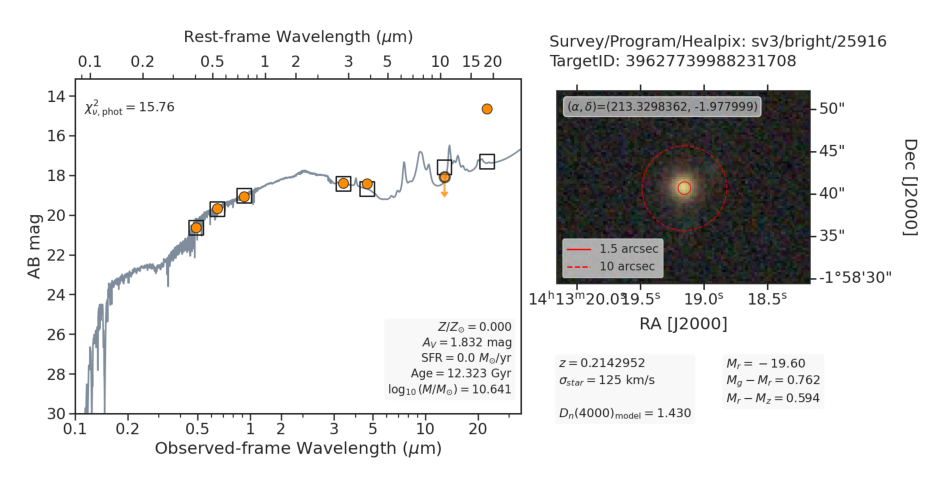

In [18]:
fastphot_pngfile = os.path.join(outdir, f'fastphot-{survey}-{program}-{healpix}-{targetid}.png')
img = mpimg.imread(fastphot_pngfile)

fig, ax = plt.subplots(figsize=(12, 12))
ax.imshow(img)
_ = ax.axis('off')

### And there's so much more!

Have fun!